# Inaugural Project 2023

In [43]:
# imports and set magics
%load_ext autoreload
%autoreload 2
import HouseholdSpecializationModel as HSM

import pandas as pd
from scipy import optimize
from scipy.interpolate import griddata

import numpy as np

%matplotlib inline
# %matplotlib qt
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})

from IPython import display
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
# load class
model = HSM.HouseholdSpecializationModelClass()

## Introduction
In this project we investigate whether the given model in the project description is good description of real life data. The model can be argued to be in the category of a Beckerian style model and describes the optimal allocation of time use for the male and the female in the model. We use estimates from (Siminki and Yetsenga 2022) for the elasticity of the relative labor supply in the household between the female and male w.r.t. the relative market wages between the female and male, to estimate fitting parameters for the model. We find that the model is unlikely to be a good fit for the data, unless we are willing to make bold assumptions about either productivity/and or relative disutility of labor for either sex.

## Question 1
* Firstly, we define the lists of alphas and sigmas given in the assignment
* Secondly, we run a nested for loop to calculate $H_F/H_M$ for different parameter values.
* Lastly, we plot the results

/Users/carlsimpson/Documents/6. semester polit/Intro Prog/projects-2023-scb/inauguralproject/HouseholdSpecializationModel.py:81: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**potens + par.alpha * HF**potens)**potens**-1


for alpha = 0.25 and sigma = 0.5, HF/HM = 0.5454545454545454
for alpha = 0.25 and sigma = 1.0, HF/HM = 0.3076923076923077
for alpha = 0.25 and sigma = 1.5, HF/HM = 0.21428571428571427
for alpha = 0.5 and sigma = 0.5, HF/HM = 1.0
for alpha = 0.5 and sigma = 1.0, HF/HM = 1.0
for alpha = 0.5 and sigma = 1.5, HF/HM = 1.0
for alpha = 0.75 and sigma = 0.5, HF/HM = 1.8333333333333333
for alpha = 0.75 and sigma = 1.0, HF/HM = 3.25
for alpha = 0.75 and sigma = 1.5, HF/HM = 4.666666666666667


Text(0.5, 1.0, '$H_F/H_M$ for varying alpha and sigma values')

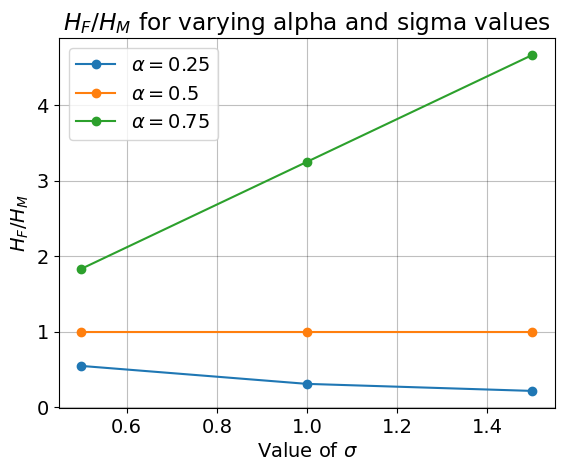

In [45]:

# List of parameters
alpha_list = [0.25,0.5,0.75]
sigma_list = [0.5,1.0,1.5]

# Create empty list for solutions
solution_list = []

# For loop to solve problem for list of parameters
for alpha in alpha_list:
    model.par.alpha = alpha
    for sigma in sigma_list:
        model.par.sigma = sigma
    
        # Solve for given alpha and sigma
        solution = model.solve_discrete()

        # Unpack solution
        HF = solution.HF
        HM = solution.HM
        solution_list.append(HF/HM)

        # Print results
        print(f'for alpha = {alpha} and sigma = {sigma}, HF/HM = {HF/HM}')

# Split solutions by value of alpha
alpha_025 = solution_list[0:3]
alpha_05 = solution_list[3:6]
alpha_075 = solution_list[6:9]

# Plot figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(sigma_list,alpha_025, label = '$α = 0.25$',marker ='o')
ax.plot(sigma_list, alpha_05, label = '$ α= 0.5$', marker = 'o')
ax.plot(sigma_list, alpha_075, label = '$α = 0.75$', marker = 'o') 
ax.set_xlabel('Value of $\sigma$')
ax.set_ylabel('$H_F/H_M$')
ax.legend(loc='upper left')
ax.set_title("$H_F/H_M$ for varying alpha and sigma values")

## Question 2

start solve_wF_vec()
wf_vec = [0.8 0.9 1.  1.1 1.2]
LM_vec = [6.  5.  4.5 4.  3. ]
HM_vec = [4.  4.5 4.5 4.5 5. ]
LF_vec = [3.  4.  4.5 5.  5.5]
HF_vec = [5.  4.5 4.5 4.  4. ]
end solve_wF_vec()


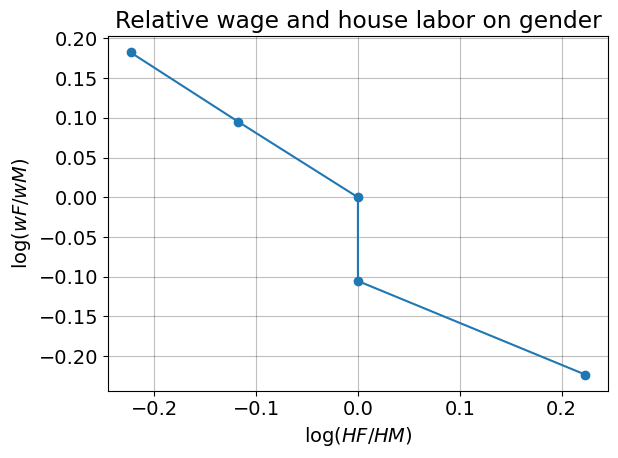

In [46]:
# a. solve discrete
model = HSM.HouseholdSpecializationModelClass()
solution = model.solve_wF_vec(discrete = True, do_print=True)

# b.  extract solution
HF_vec = solution.HF_vec
HM_vec = solution.HM_vec
wF_vec = model.par.wF_vec

# c. transform data for plot 
log_HFM = np.log(HF_vec/HM_vec)
log_wFM = np.log(wF_vec)  # note that wM = 1, so wF_vec/wM = wF_vec

# d. create figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(log_HFM,log_wFM, marker='o')
ax.set_title('Relative wage and house labor on gender')
ax.set_xlabel('$\log(HF/HM)$')
ax.set_ylabel("$\log(wF/wM)$")
fig.tight_layout()

## Question 3

start solve_wF_vec()
wf_vec = [0.8 0.9 1.  1.1 1.2]
LM_vec = [5.88926508 5.16759721 4.45449157 3.76196967 3.08968621]
HM_vec = [4.09256684 4.27109629 4.45449155 4.63947483 4.83264873]
LF_vec = [2.86973981 3.7493099  4.45449157 5.02416695 5.47961068]
HF_vec = [5.11571312 4.74568063 4.45449158 4.21803166 4.02720497]
end solve_wF_vec()


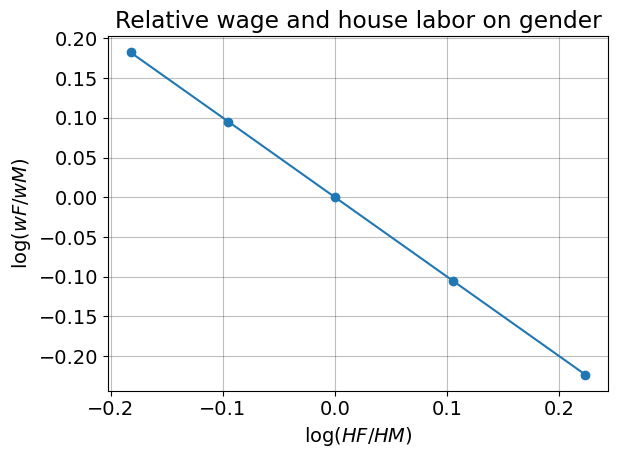

In [47]:
# a. solve continously
model = HSM.HouseholdSpecializationModelClass()
solution = model.solve_wF_vec(discrete = False, do_print=True)

# b. extract solutions
HF_vec = solution.HF_vec
HM_vec = solution.HM_vec
wF_vec = model.par.wF_vec

# c. transform data for plotting
log_HFM = np.log(HF_vec/HM_vec)
log_wFM = np.log(wF_vec)  # note that wM = 1, so wF_vec/wM = wF_vec

# d. create figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(log_HFM,log_wFM, marker = 'o')
ax.set_title('Relative wage and house labor on gender')
ax.set_xlabel('$\log(HF/HM)$')
ax.set_ylabel('$\log(wF/wM)$')
fig.tight_layout()

## Question 4

We estimate $\sigma$ and $\alpha$ such that the error function $error = (\beta_{0}-\hat \beta_0)^2+(\beta_1-\hat \beta_1)^2$ is minimized, where we assume that $\beta_0=0.4$ and $\beta_1 \approx -0.1$.

First we plot the error function for discrete values of $\alpha$ and $\sigma$ and secondly we minimize the loss function using the scipy module.


**4.1 plots**

Plotting the errors for different values of $\sigma$ and $\alpha$ restricting the values of the error function gradually, suggests that the estimates that reduce the loss function lies in a neighbourhood of $\alpha$ close to 1 and $\sigma$ close to zero.

***Note that the commented out code produces the resultsbigloop.pkl file which is already in the working directory***

In [48]:
# The following loop create the file resultsbigloop.pkl which can be found in the "output_from_loops_folder"
#model = HouseholdSpecializationModelClass()
#results = {}
#for i in ['alpha', 'sigma', 'error']:
#      results[i] = []
#
# for model.par.alpha in tqdm(np.linspace(0,1, 100)):
#    for model.par.sigma in np.linspace(0, 100, 100):
#            sol = model.solve_wF_vec()
#            model.run_regression()
#            #beta0hat = model.sol.beta0
#            #beta1hat = model.sol.beta1
#            error = model.error_function()
#            results['alpha'].append(model.par.alpha)
#            results['sigma'].append(model.par.sigma)
#            results['error'].append(error) 
#
# model.par.alpha = 0.5
# model.par.sigma = 1
# #Save results from loop:
# results = pd.DataFrame(results)
# results.sort_values(by='error')
# results.to_pickle(os.path.join('output_from_loops','resultsbigloop.pkl'))


In [49]:
# reload results
results = pd.read_pickle('resultsbigloop.pkl')
results.head()

,alpha,sigma,error
0,0.0,0.000000,0.17
1,0.0,1.010101,NaN
2,0.0,2.020202,NaN
3,0.0,3.030303,NaN
4,0.0,4.040404,NaN


**Plots the error function for different error tolerances**

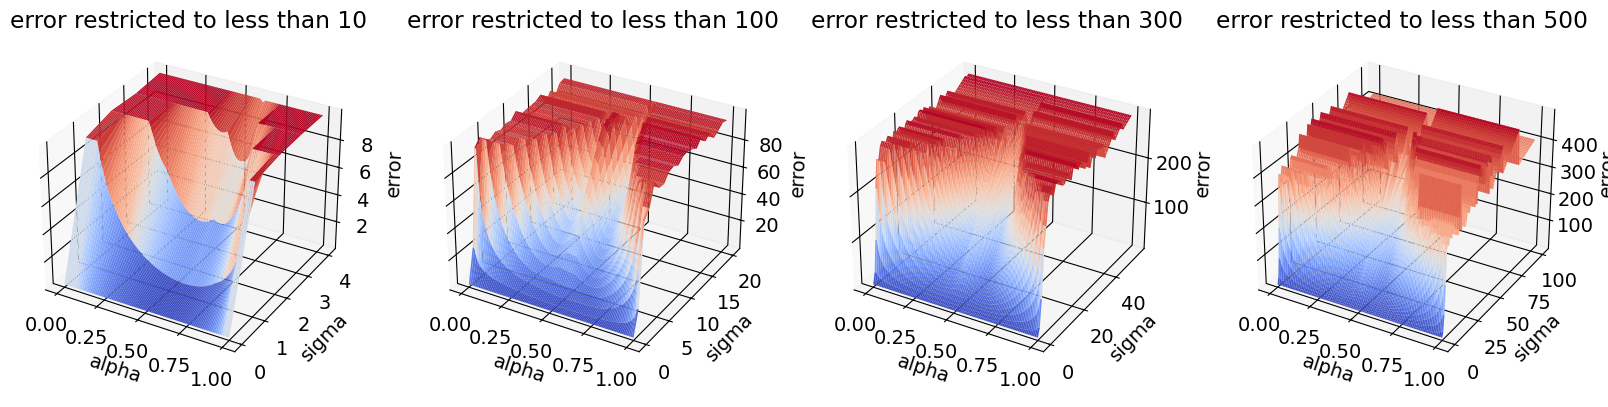

In [50]:
error_cutoff = [10, 100, 300, 500]
model.mutipleplots(error_cutoff, results)

The above figures suggest that $\sigma$ should be at least less than 3. Plotting the eror function for $\sigma \in (0,3)$ can help set some starting values for the optimization problem.

***note again that this commented out code, produces the file 'results_sigma_low.pkl' which is already in the working directory***

In [51]:
# Code for generating data for sigma in (0,3) generates data for outputfile 'results_sigma_low.pkl'
# The data for 'results_sigma_low.pkl' can be read directly in the next cell.  
#results_sigma_low = {}
#for i in ['alpha', 'sigma', 'error']:
#      results_sigma_low[i] = []
#
#for model.par.alpha in tqdm(np.linspace(0,1, 50)):
#    for model.par.sigma in np.linspace(0, 3, 50):
#            sol = model.solve_wF_vec()
#            model.run_regression()
#            #beta0hat = model.sol.beta0
#            #beta1hat = model.sol.beta1
#            error = model.error_function()
#            results_sigma_low['alpha'].append(model.par.alpha)
#            results_sigma_low['sigma'].append(model.par.sigma)
#            results_sigma_low['error'].append(error) 
#
#model.par.alpha = 0.5
#model.par.sigma = 1
# #save results 
#results_sigma_low = pd.DataFrame(results_sigma_low)
#results_sigma_low.to_pickle(os.path.join('output_from_loops','results_sigma_low.pkl'))

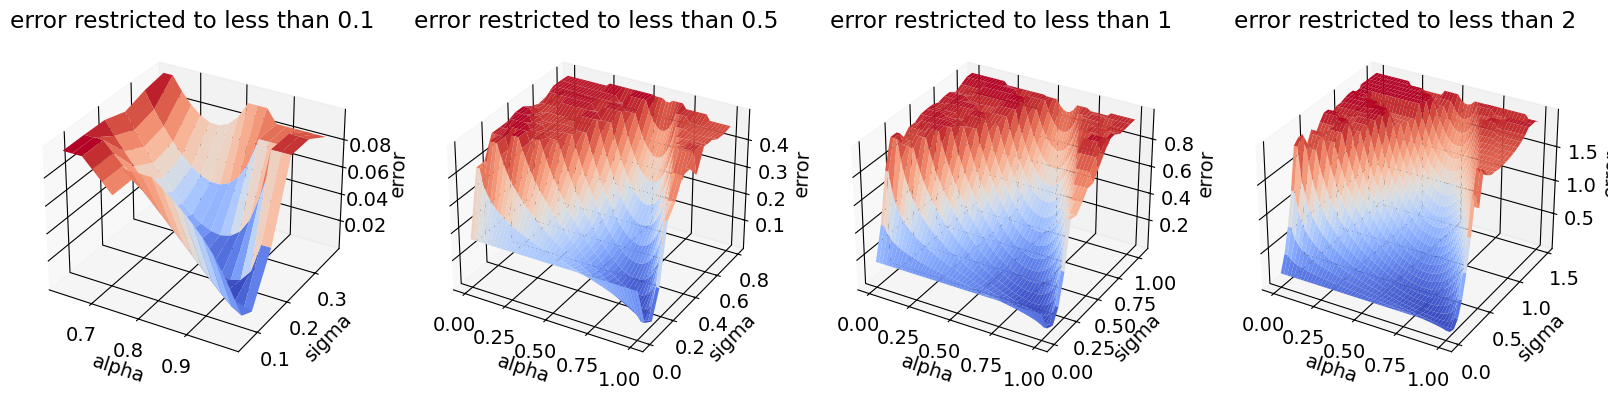

In [52]:
results_sigma_low = pd.read_pickle('results_sigma_low.pkl')
# plots the error function for different error cutoffs 
error_cutoff = [0.1, 0.5, 1, 2]

model.mutipleplots(error_cutoff, results_sigma_low)

In [56]:
# solve for optimal parameters usign scipy, 
model = HSM.HouseholdSpecializationModelClass()
model.par.sigma = 0.9 #set starting value for optimisation problem for sigma to 0.9
model.par.alpha = 0.51 #set starting value for optimisation problem for alpha to 0.51
parnames=['sigma', 'alpha']
error = model.estimate(parnames)
print(f"The error is {error}")

sigma      = 0.1000
alpha      = 0.9820

The error is 3.8134087461235684e-17


Using the parameter $\sigma=0.1$ and $\alpha=0.9820$ we minimize the error function such that $(\beta_{0}-\hat \beta_0)^2+(\beta_1-\hat \beta_1)^2\approx 0$ . These results suggests that women have to be seriously more productive than men in the household if we want the model to fit the data.

## Question 5
We suggest altering the model by adding a disutility of household labor for the male in the household. We could a priori argue for this if we imagine that the man has his feelings hurt when working in the household, because the man might feel emasculated when doing dishes or similar tasks. This is under the assumption that the man gets disutility from feeling emasculated, we could easily imagine this in a country as the USA. Mathematically we implement the feeling of emasculation by weighting the disutility of time spent in the household with a paramter $\psi$, such that the utility function is like this:
$$
\max_{L_{M},H_{M},L_{F},H_{F}}\frac{Q^{1-\rho}}{1-\rho}-\nu\left(\frac{(L_{M}+\psi H_{M}){}^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}+\frac{T_{F}^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}\right),\rho>1,\nu>0,\epsilon>0,\psi>0
$$
Here it is assumed that the entire household takes the extra disutility of the man into account when making their choice on how to distribute their time working.

In [54]:
model.par.sigma = 0.5
model.par.alpha = 0.5
model.par.psi = 5
parnames = ['sigma', 'psi']
error_new = model.estimate(parnames)

sigma      = 0.1306
psi        = 20.7807



In [55]:
print(f"For the above disutility parameter of psi = 20.7807, we find an error of only: {error_new}")

For the above disutility parameter of psi =20.7807, we find an error of only: 1.1633268690328805e-14


# Conclusion
If men are not very unproductive, or feel very sad feelings when doing dishes, cleaning & cooking, it is hard to argue that the model is a good fit for the data. The results in our project are in concurrence with the findings of  Siminski and Yetsenga (2022), who don't find that the Beckerian model is very good fit for their data.